In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [88]:
house_df = pd.read_csv("data/AmesHousing.csv")
house_df.shape

(2930, 82)

In [89]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [90]:
columns_to_use = ['Lot Area', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Garage Cars',
    'Total Bsmt SF', 'Full Bath', 'Bedroom AbvGr', 'Kitchen Qual', 'SalePrice']
house_df = house_df[columns_to_use]

In [91]:
# Lot Area: 대지 면적
# Overall Qual: 건축 품질
# Year built: 건축 연도
# Gr Liv Area: 지상 생활 면적
# Garage Cars: 차고 차 수용량
# Total Bsmt SF: 지하 면적
# Full Bath: 변기, 세면대, 욕조, 샤워기가 전부 있는 욕실
# Bedroom AbvGr: 지하층 위 침실 수
# Kitchen Qual: 주방 품질 (범주형)
# SalePrice: 판매 가격 (타겟 변수)

In [92]:
print(house_df.shape)
print(house_df.info())

(2930, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot Area       2930 non-null   int64  
 1   Overall Qual   2930 non-null   int64  
 2   Year Built     2930 non-null   int64  
 3   Gr Liv Area    2930 non-null   int64  
 4   Garage Cars    2929 non-null   float64
 5   Total Bsmt SF  2929 non-null   float64
 6   Full Bath      2930 non-null   int64  
 7   Bedroom AbvGr  2930 non-null   int64  
 8   Kitchen Qual   2930 non-null   object 
 9   SalePrice      2930 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 229.0+ KB
None


In [93]:
house_df.describe(include='all')

,Lot Area,Overall Qual,Year Built,Gr Liv Area,Garage Cars,Total Bsmt SF,Full Bath,Bedroom AbvGr,Kitchen Qual,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930,2930.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494,NaN
mean,10147.921843,6.094881,1971.356314,1499.690444,1.766815,1051.614544,1.566553,2.854266,NaN,180796.060068
std,7880.017759,1.411026,30.245361,505.508887,0.760566,440.615067,0.552941,0.827731,NaN,79886.692357
min,1300.000000,1.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,0.000000,NaN,12789.000000
25%,7440.250000,5.000000,1954.000000,1126.000000,1.000000,793.000000,1.000000,2.000000,NaN,129500.000000
50%,9436.500000,6.000000,1973.000000,1442.000000,2.000000,990.000000,2.000000,3.000000,NaN,160000.000000
75%,11555.250000,7.000000,2001.000000,1742.750000,2.000000,1302.000000,2.000000,3.000000,NaN,213500.000000


In [94]:
house_df.head()

,Lot Area,Overall Qual,Year Built,Gr Liv Area,Garage Cars,Total Bsmt SF,Full Bath,Bedroom AbvGr,Kitchen Qual,SalePrice
0,31770,6,1960,1656,2.0,1080.0,1,3,TA,215000
1,11622,5,1961,896,1.0,882.0,1,2,TA,105000
2,14267,6,1958,1329,1.0,1329.0,1,3,Gd,172000
3,11160,7,1968,2110,2.0,2110.0,2,3,Ex,244000
4,13830,5,1997,1629,2.0,928.0,2,3,TA,189900


In [95]:
null_value = house_df.isnull().sum()
# null_value[null_value != 0]
null_value

Lot Area         0
Overall Qual     0
Year Built       0
Gr Liv Area      0
Garage Cars      1
Total Bsmt SF    1
Full Bath        0
Bedroom AbvGr    0
Kitchen Qual     0
SalePrice        0
dtype: int64

In [96]:
def auto_eda(df, group_col, target_col, **kwargs):
    print(f"{group_col} 별 {target_col} 통계")
    print(df.groupby(group_col)[target_col].describe())

    normalize = kwargs.get('normalize', False)

    print("\nValue Counts" + (" (비율)" if normalize else " (빈도)"))
    grouped = df.groupby(group_col)[target_col]

    if normalize:
        result = grouped.apply(lambda x: x.value_counts(normalize=True))
    else:
        result = grouped.value_counts()

    print(result)

In [97]:
# 건축 연도와 건축 퀄리티의 연관이 있는가
auto_eda(house_df, 'Year Built', 'Overall Qual')

Year Built 별 Overall Qual 통계
            count      mean       std  min  25%  50%  75%   max
Year Built                                                     
1872          1.0  8.000000       NaN  8.0  8.0  8.0  8.0   8.0
1875          1.0  5.000000       NaN  5.0  5.0  5.0  5.0   5.0
1879          1.0  7.000000       NaN  7.0  7.0  7.0  7.0   7.0
1880          5.0  6.000000  1.000000  5.0  5.0  6.0  7.0   7.0
1882          1.0  8.000000       NaN  8.0  8.0  8.0  8.0   8.0
...           ...       ...       ...  ...  ...  ...  ...   ...
2006        138.0  7.659420  1.077279  5.0  7.0  8.0  8.0  10.0
2007        109.0  7.743119  1.003731  5.0  7.0  8.0  8.0  10.0
2008         49.0  8.367347  1.034688  6.0  8.0  9.0  9.0  10.0
2009         25.0  7.600000  1.154701  6.0  7.0  7.0  9.0  10.0
2010          3.0  8.000000  1.000000  7.0  7.5  8.0  8.5   9.0

[118 rows x 8 columns]

Value Counts (빈도)
Year Built  Overall Qual
1872        8               1
1875        5               1
1879       

In [98]:
# 건축 퀄리티와 부엌의 퀄리티는 비례 하는가
auto_eda(house_df, 'Overall Qual', 'Kitchen Qual')

Overall Qual 별 Kitchen Qual 통계
             count unique top freq
Overall Qual                      
1                4      2  Fa    3
2               13      3  TA    9
3               40      3  TA   30
4              226      3  TA  182
5              825      5  TA  662
6              732      4  TA  469
7              602      4  Gd  457
8              350      3  Gd  286
9              107      2  Ex   88
10              31      2  Ex   28

Value Counts (빈도)
Overall Qual  Kitchen Qual
1             Fa                3
              TA                1
2             TA                9
              Fa                3
              Gd                1
3             TA               30
              Fa                7
              Gd                3
4             TA              182
              Fa               23
              Gd               21
5             TA              662
              Gd              126
              Fa               21
              Ex           

In [99]:
categorical_val = ['Kitchen Qual']
numeric_val = columns_to_use.copy()
numeric_val.remove('Kitchen Qual')
numeric_val

['Lot Area',
 'Overall Qual',
 'Year Built',
 'Gr Liv Area',
 'Garage Cars',
 'Total Bsmt SF',
 'Full Bath',
 'Bedroom AbvGr',
 'SalePrice']

In [100]:
def check_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column} IQR 범위: {lower:.2f} ~ {upper:.2f}")
    print(f"{column} IQR 이상치 수: {(data[column] < lower).sum() + (data[column] > upper).sum()}")
    return outliers

Lot Area IQR 범위: 1267.75 ~ 17727.75
Lot Area IQR 이상치 수: 127


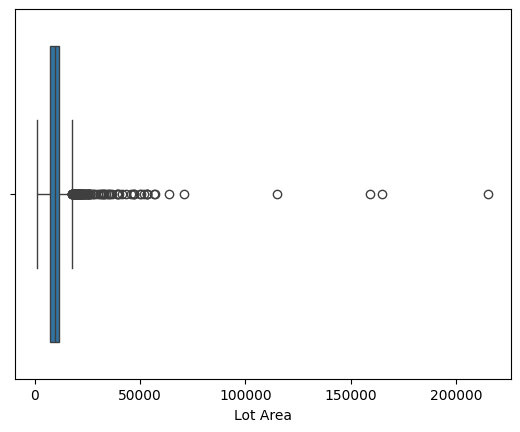

Overall Qual IQR 범위: 2.00 ~ 10.00
Overall Qual IQR 이상치 수: 4


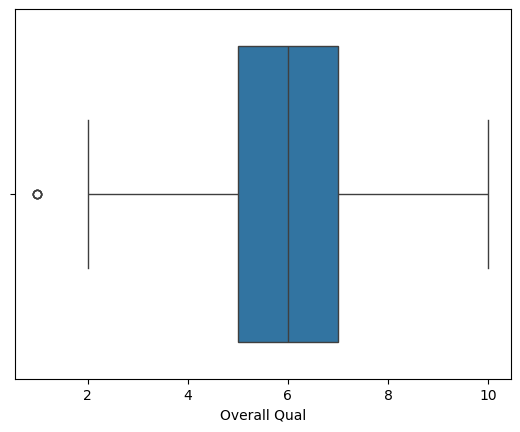

Year Built IQR 범위: 1883.50 ~ 2071.50
Year Built IQR 이상치 수: 9


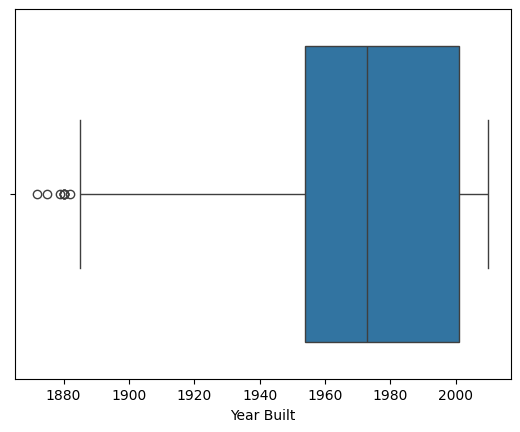

Gr Liv Area IQR 범위: 200.88 ~ 2667.88
Gr Liv Area IQR 이상치 수: 75


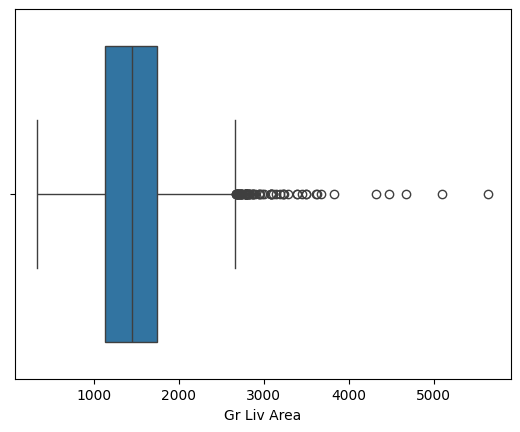

Garage Cars IQR 범위: -0.50 ~ 3.50
Garage Cars IQR 이상치 수: 17


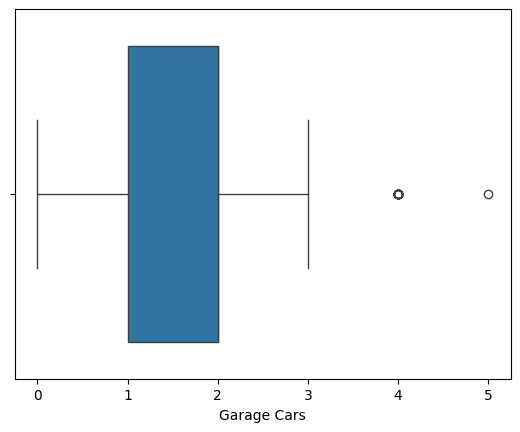

Total Bsmt SF IQR 범위: 29.50 ~ 2065.50
Total Bsmt SF IQR 이상치 수: 123


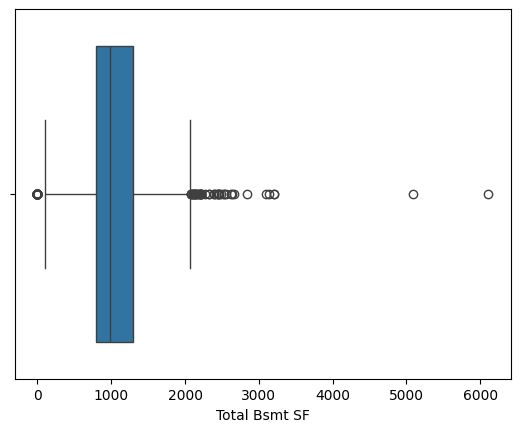

Full Bath IQR 범위: -0.50 ~ 3.50
Full Bath IQR 이상치 수: 4


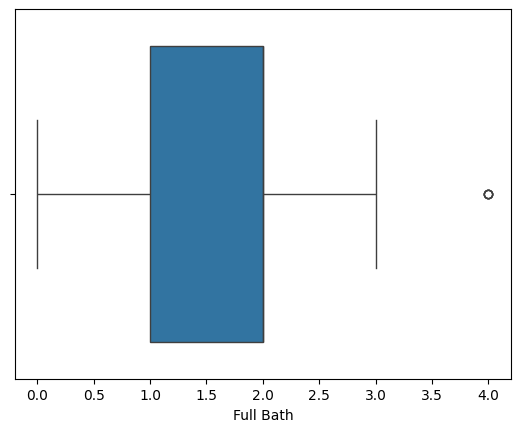

Bedroom AbvGr IQR 범위: 0.50 ~ 4.50
Bedroom AbvGr IQR 이상치 수: 78


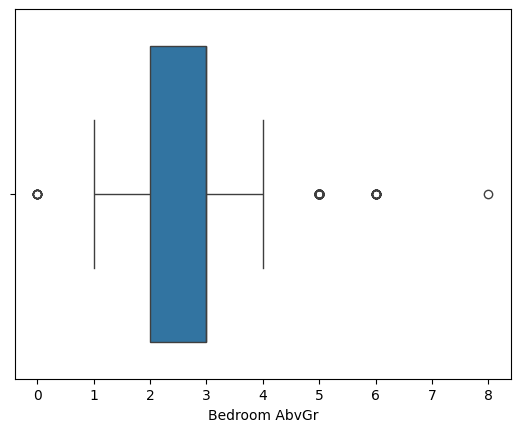

SalePrice IQR 범위: 3500.00 ~ 339500.00
SalePrice IQR 이상치 수: 137


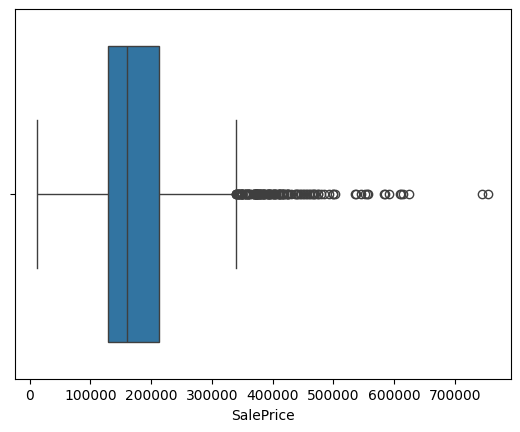

In [101]:
for col in numeric_val:
    outliers = check_outliers_iqr(house_df, col)
    sns.boxplot(x=house_df[col])
    plt.show()

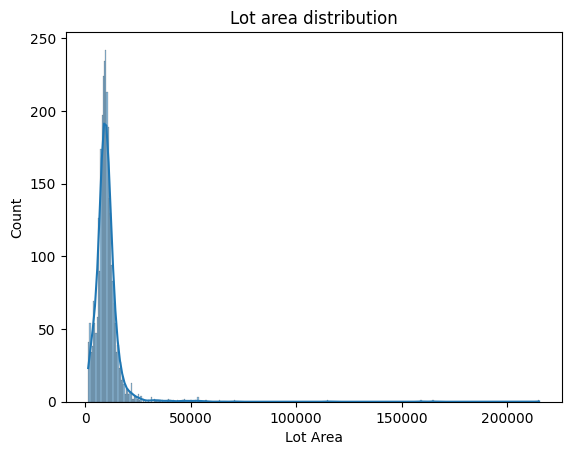

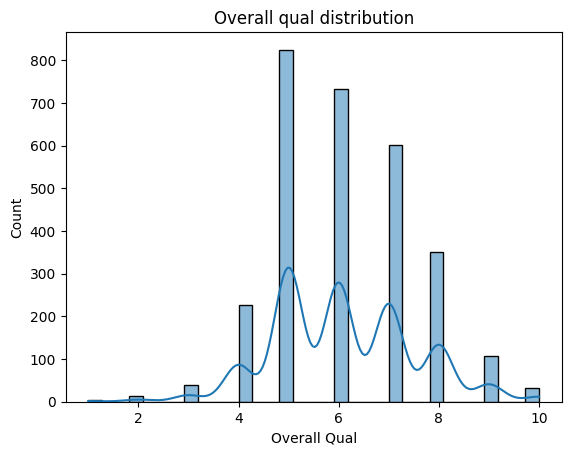

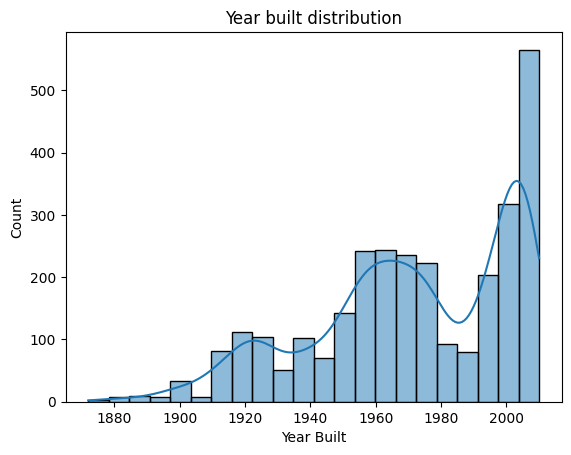

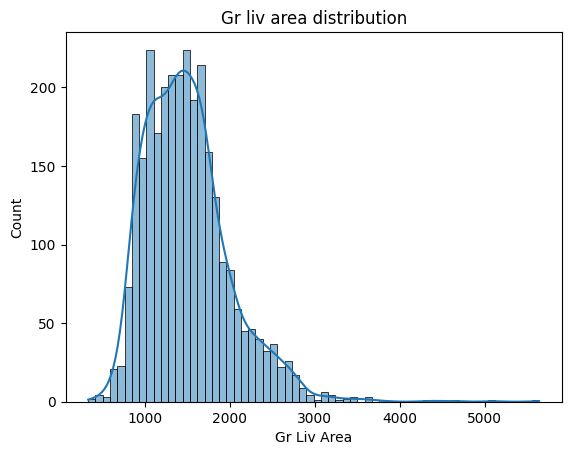

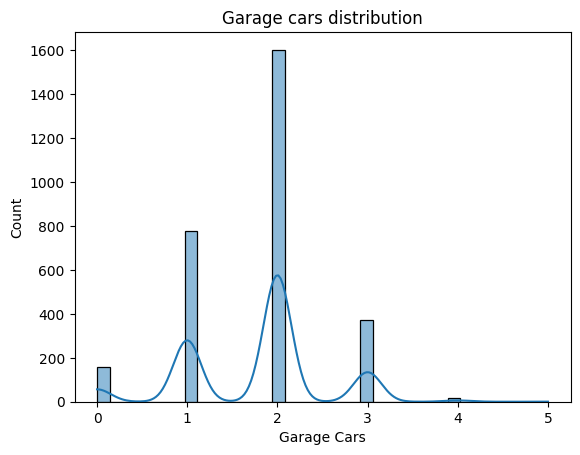

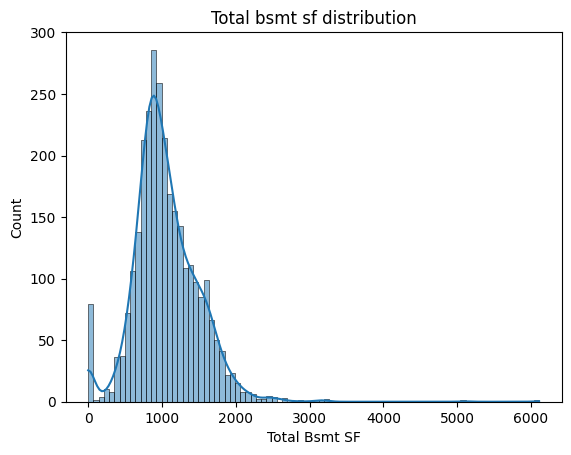

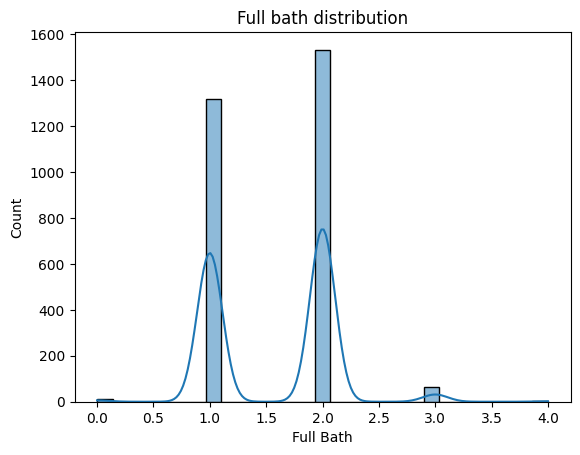

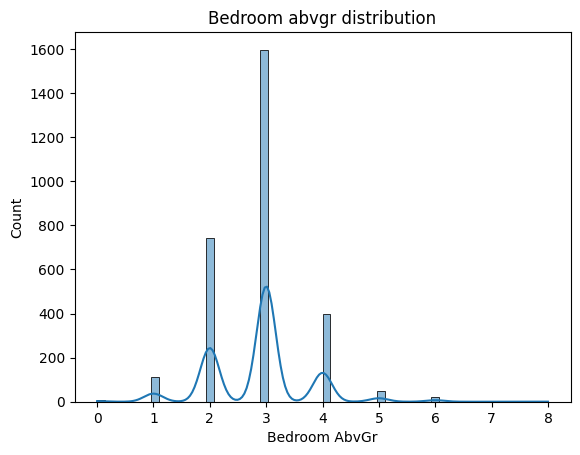

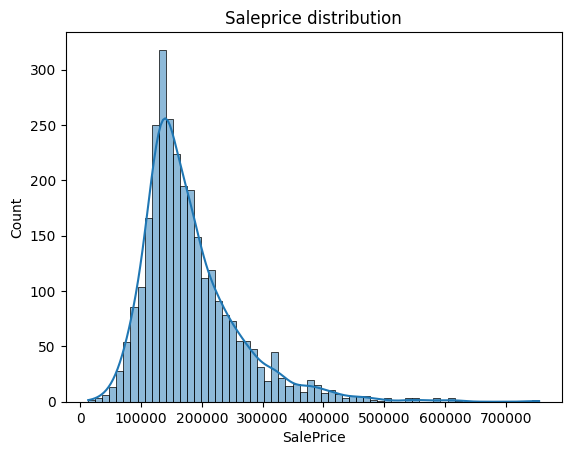

In [102]:
# 수치형 변수 시각화
for val in numeric_val:
    plt.figure()
    sns.histplot(data=house_df, x=val, kde=True)
    plt.title(f'{val.capitalize()} distribution')
    plt.show()

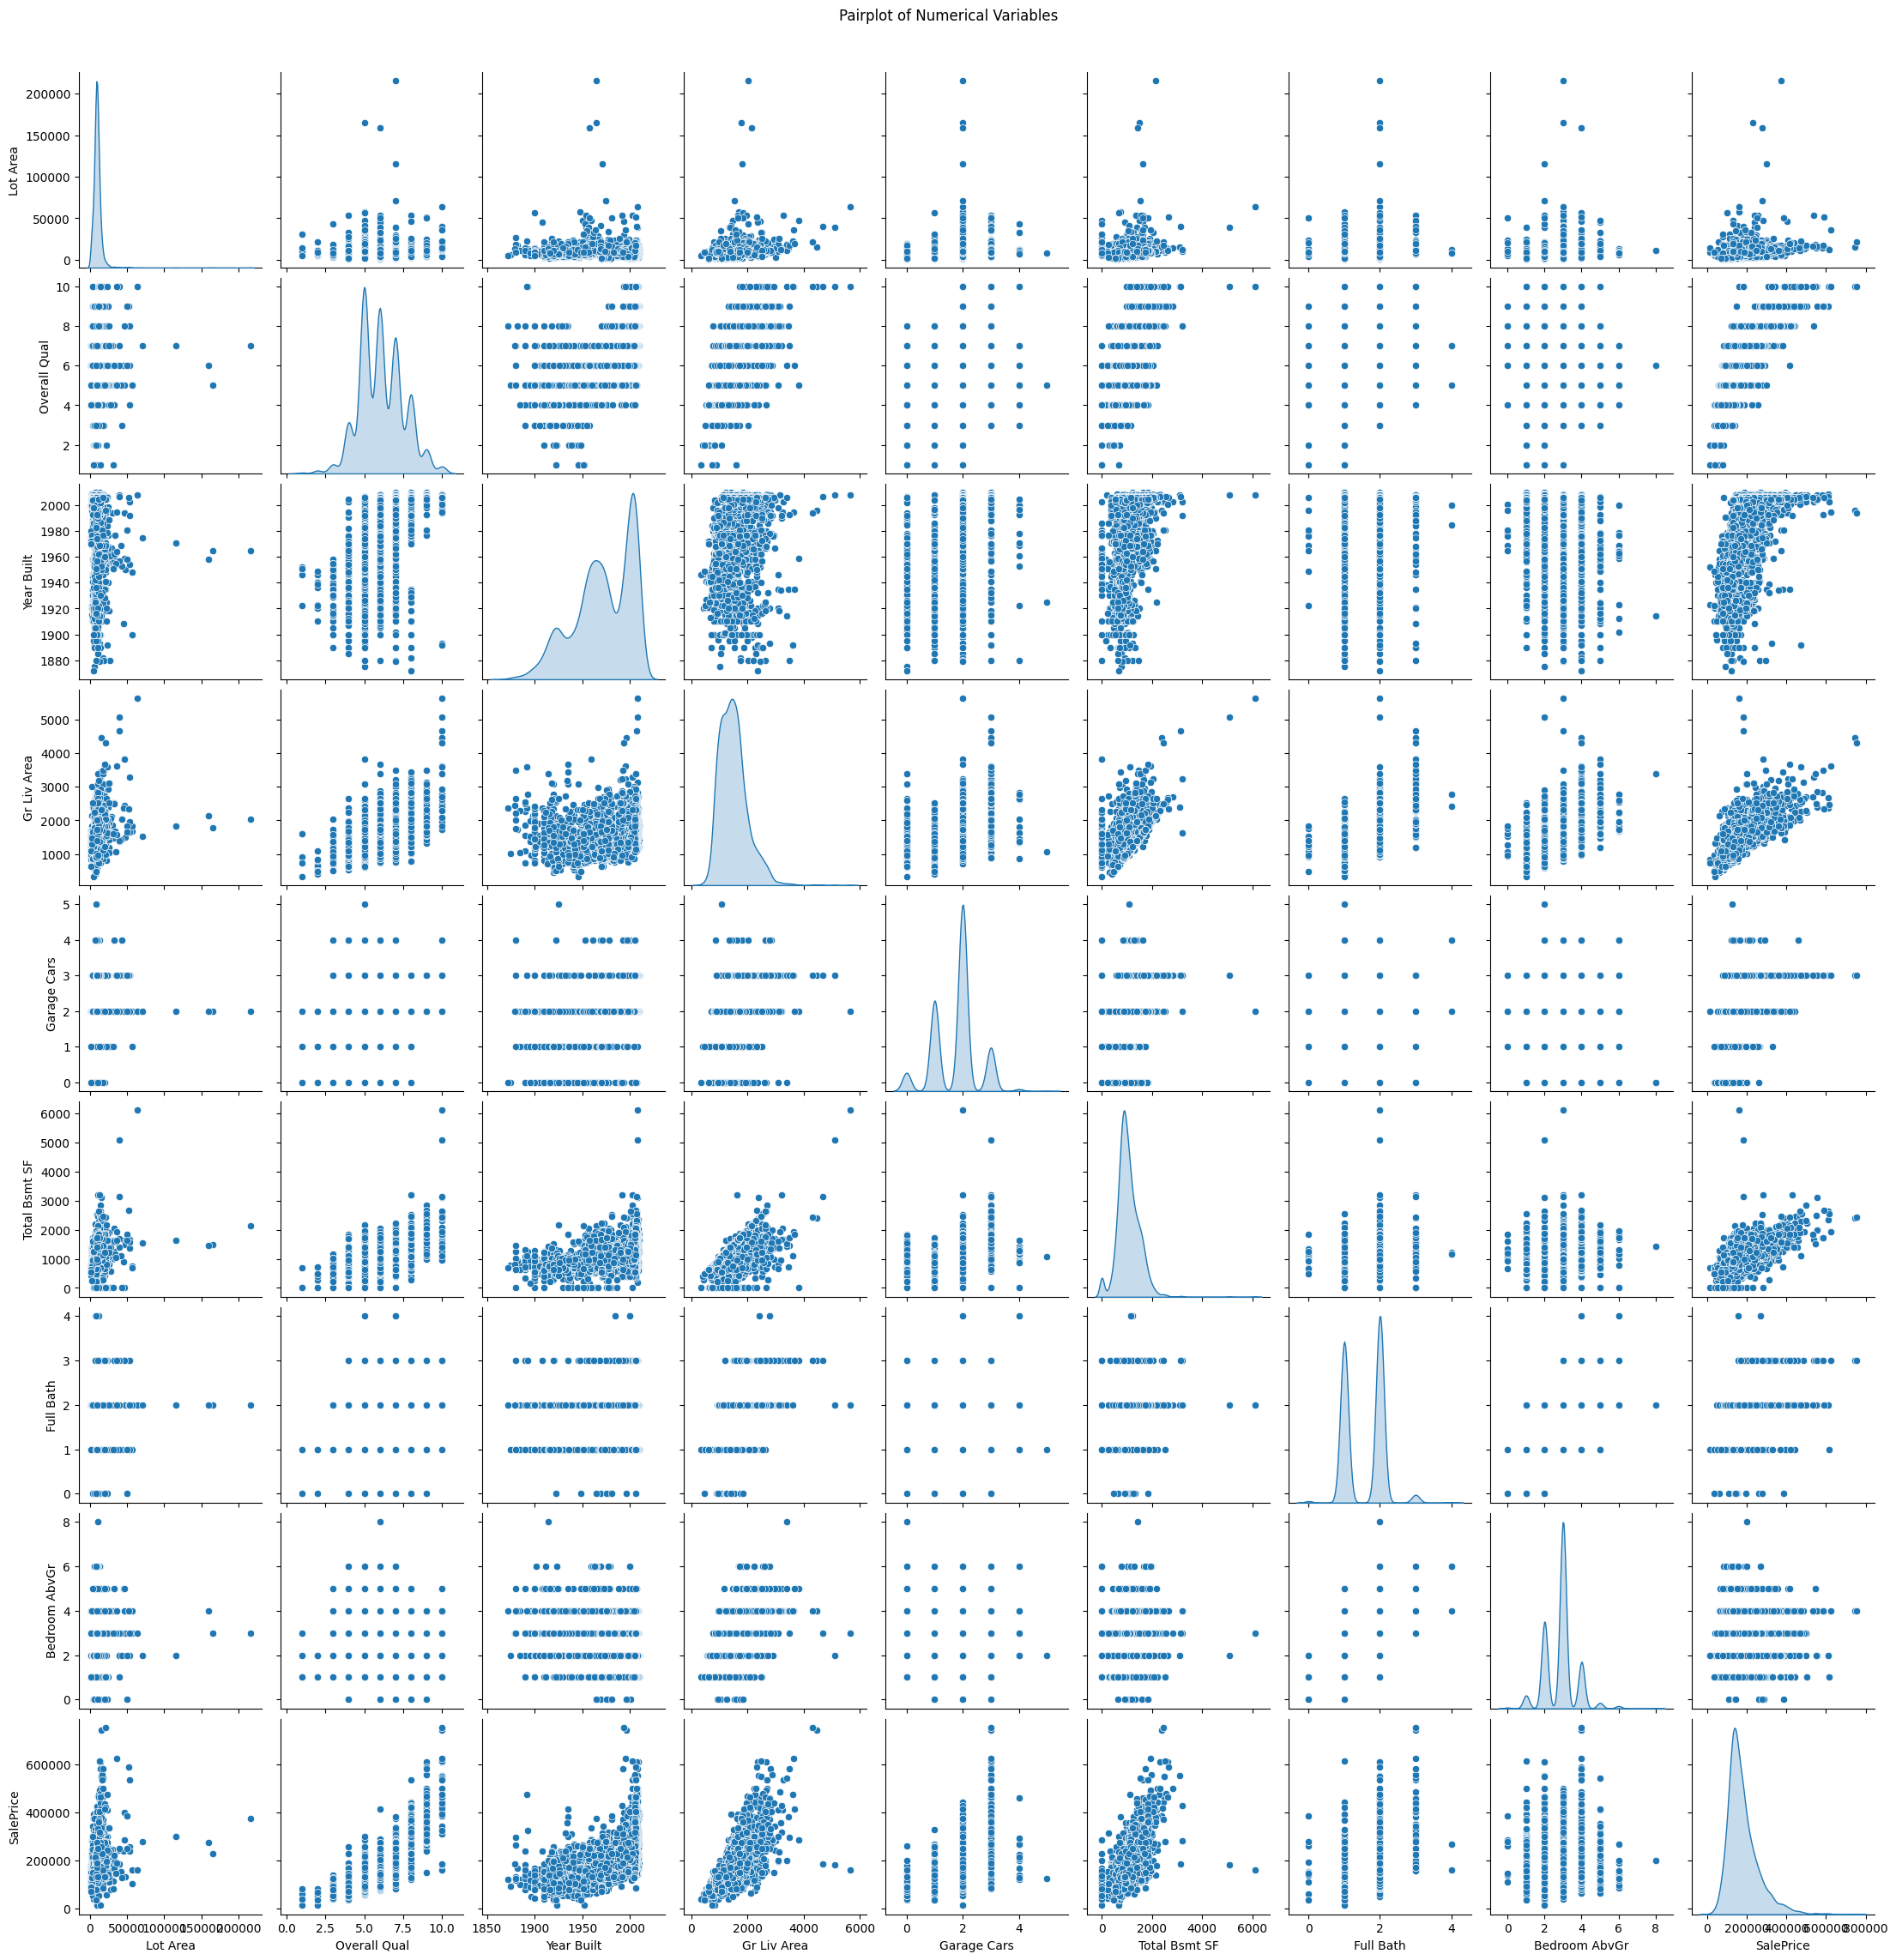

In [103]:
# 수치형 변수관의 관계
sns.pairplot(house_df, diag_kind="kde")
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

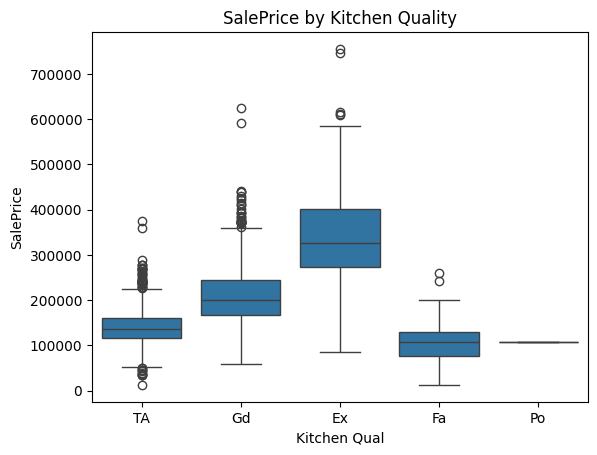

In [104]:
# 범주형 변수와 타겟변수 관계
sns.boxplot(x='Kitchen Qual', y='SalePrice', data=house_df)
plt.title("SalePrice by Kitchen Quality")
plt.show()

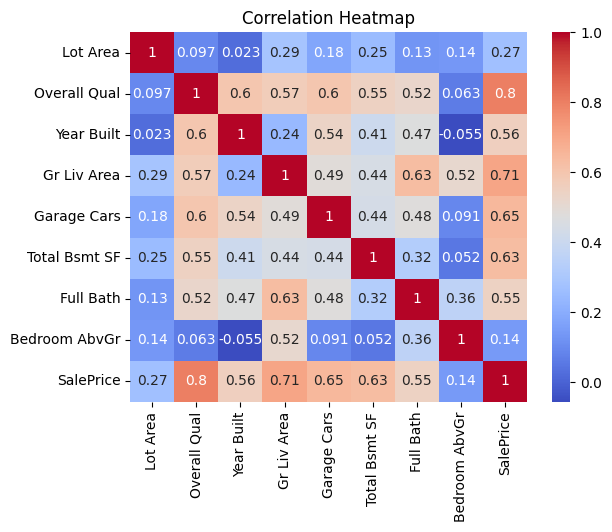

In [105]:
# 상관관계 히트맵
sns.heatmap(house_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [106]:
# 대지 면적, 침실의 갯수는 판매가랑 상관이 거의 없고, 건축 퀄리티, 지상 생활 면적이 매우 강한 상관관계를 보인다.

In [107]:
profile = ProfileReport(house_df, title='Ames House Profileing report', explorative=True)
profile.to_file("day5_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1111.96it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

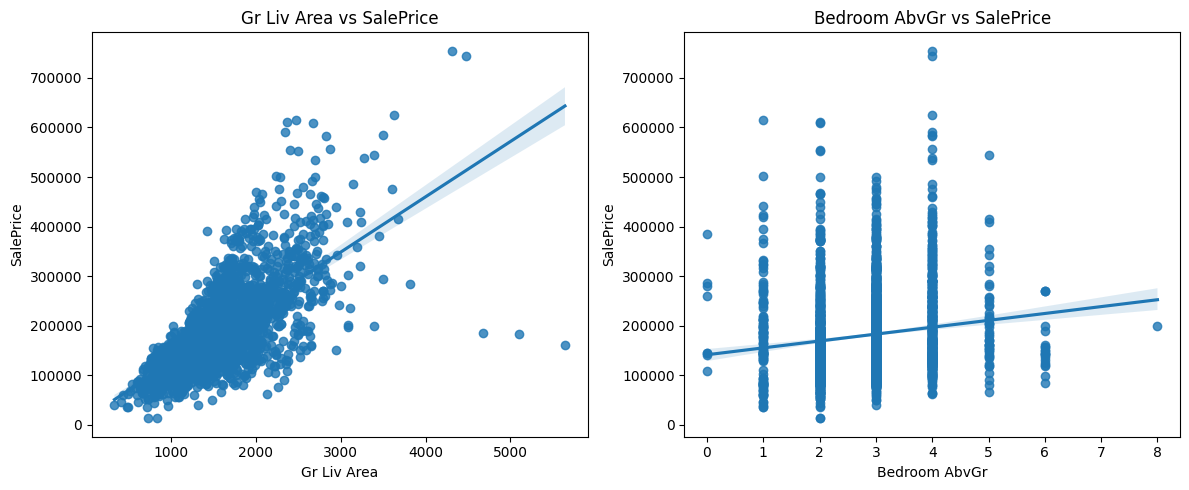

In [112]:
# 주요 인사이트 정리하다가 궁금해서 그려본 regplot(scatterplot+회귀선)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(x='Gr Liv Area', y='SalePrice', data=house_df, ax=axs[0])
axs[0].set_title("Gr Liv Area vs SalePrice")

sns.regplot(x='Bedroom AbvGr', y='SalePrice', data=house_df, ax=axs[1])
axs[1].set_title("Bedroom AbvGr vs SalePrice")

plt.tight_layout()
plt.show()